# Explore Byte Back data

Goals: 1) Describe observations; 2) Identify any problems in dataset and find ways to fix them; 3)storytelling with data

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding = 'iso-8859-1')

There at 43 columns and 4705 observations (rows).
There appear to be only 4 numerical columns, but some may be misclassified.
Regarding descriptive statistics below, age is the only column where the mean (average) and standard deviation really mean anything.  The other columns are numbers but changes in units of them don't have significance.

In [3]:
print(df.shape)
df.describe()

(4705, 43)


,FY13_14_15_ID,Class ID,Zip Code,Age
count,4705.000000,4705.000000,4380.000000,4210.000000
mean,1293.578959,5914.398937,20071.764384,49.142755
std,733.706499,283.036432,228.459502,14.393192
min,1.000000,5550.000000,20001.000000,14.000000
25%,654.000000,5694.000000,20010.000000,39.250000
50%,1308.000000,5836.000000,20018.000000,52.000000
75%,1870.000000,6129.000000,20020.000000,59.000000
max,2703.000000,7021.000000,22314.000000,95.000000


Start date and end date need to be made into date-time data types for use later on

In [4]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [5]:
#make sure it worked
print(type(df['Start Date']))
print(type(df['End Date']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In this dataset, the most enrollment was in 2013, followed by 2013, 2015, and then 2012.  Unsure what this means regarding total number of students at Byte Back. 

In [6]:
print(df['Start Date'].dt.year.value_counts().sort_index())

2012     673
2013    1601
2014    1571
2015     860
Name: Start Date, dtype: int64


Histogram of how many observations by year of start date

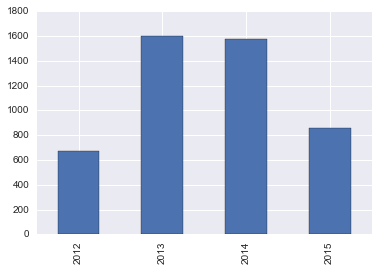

In [7]:
df['Start Date'].dt.year.value_counts().sort_index().plot(kind='bar')

Line plot below shows that in January (month 1) enrollment is the highest, followed by September, then March.

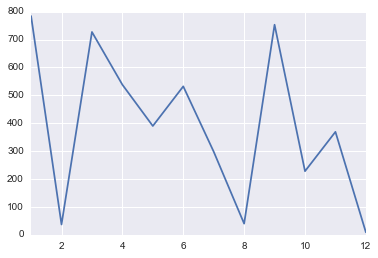

In [12]:
df['Start Date'].dt.month.value_counts().sort_index().plot()

There are 488 unique class ID numbers and 2696 student numbers

In [15]:
len(df['Class ID'].unique())

488

In [16]:
len(df['FY13_14_15_ID'].unique())

2696

Look at sum of blank (null) values by column:

In [17]:
df.isnull().sum().sort_values()

FY13_14_15_ID                  0
Class ID                       0
Class Name                     0
Start Date                     0
End Date                       0
Enrollment Status              0
Location                       3
Instructor                    13
Gender                       128
Race                         164
State                        177
City                         181
Zip Code                     325
Housing                      334
Employed                     350
Class Result                 425
DOB                          495
Age                          495
Pass/DNP                     510
Highest Education            537
Full or Part Time            929
Available and Looking        968
With or Without Benefits     995
Long Term or Temporary      1041
Time                        1061
Ward                        1203
Special Funding             1282
Reason for Unemployment     1283
Length of Unemployed        1467
Income Documentation        1615
Monthly In

As you can see, there is ALOT of missing data.  This is one problem with the data.

Another problem is that many columns have similar text, but it is entered slightly differently.  This needs to be grouped and standardized. I will do this for Class Name, Pass/DNP, Time, Gender, and Race - otherwise I wouldn't be able to plot anything because there would be too much going on on the x-axis and there would be too many categories for similar answers.

In [18]:
df['Class Name']=df['Class Name'].str.lower()

In [19]:
import warnings
warnings.filterwarnings("ignore")

df['Class Name'][df['Class Name'].isin(['pc for beginners-1','pc for beginners-2','pc for beginners-6 week',\
                                        'pc for beginners-2 for literacy learners', 'pc for beginners-1 for literacy learners'])] = 'PC for Beginners'
df['Class Name'][df['Class Name'].isin(['office track'])] = 'Office Track'
df['Class Name'][df['Class Name'].isin(['administrative assistant-ic3 certification'])] = 'IC3'
df['Class Name'][df['Class Name'].isin(['mos excel','mos access', 'mos word', 'mos:outlook'])] = 'MOS'
df['Class Name'][df['Class Name'].isin(['a+ certification','a+ boot camp'])] = 'A+'
df['Class Name'][df['Class Name'].isin(['enterprise: quickbooks','quickbooks','enterprise: web design', 'enterprise: graphic design'\
                                       'enterprise: online tools', 'enterprise: office track', 'enterprise: excel for business',\
                                       'enterprise: money management', 'money management', 'enterprise: graphic design','enterprise: access', 'enterprise: online tools'])] = 'Enterprise'
df['Class Name'][df['Class Name'].isin(['pc for beginners-1-spanish','pc for beginners-2-spanish', 'office track-spanish', 'pc for beginners-6-week-spanish'])] = 'Spanish Classes'
df['Class Name'][df['Class Name'].isin(['sytt','pc hardware and networking', 'mcitp', 'sasha bruce tech sampler','html 1&2', 'html 1&2'\
                                       'windows 7', 'net+ certification', 'windows 7', 'mta'])] = 'Other'

I grouped the classes into eight different classes (shown below).  This is what made logical sense to me, but I can easily change the grouping.

In [20]:
df['Class Name'].value_counts()

PC for Beginners    2516
Office Track         835
Enterprise           468
Other                344
Spanish Classes      205
IC3                  147
A+                   117
MOS                   73
Name: Class Name, dtype: int64

Below you can see that PC for Beginners is definitely the most popular class.

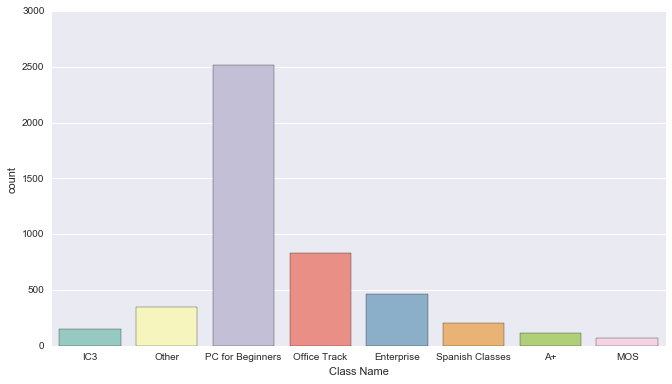

In [21]:
plt.figure(figsize=(11,6))
sns.countplot(df['Class Name'], palette = 'Set3')

Pass/DNP has the same thing written different ways - fix this

In [23]:
df['Pass/DNP'][df['Pass/DNP'].isin(['Pass','pass','PASS','2 out of 3'])] = 'pass'
df['Pass/DNP'][df['Pass/DNP'].isin(['1/3','1 out of 3', 'DNP', '0 out of 3', 'No Show'])] = 'DNP'
df['Pass/DNP'][df['Pass/DNP'].isin(['1 of 2', '1 out 2', '1 out of 2', '1/2'])] = '50%'
df['Pass/DNP'][df['Pass/DNP'].isin(['TBD','n/a', '3-Jan', '2-Jan'])] = 'TBD'

In [24]:
df['Pass/DNP'].value_counts()

pass    2823
DNP     1219
TBD      142
50%       11
Name: Pass/DNP, dtype: int64

In [27]:
df['Instructor']=df['Instructor'].str.lower()
df['Instructor'][df['Instructor'].isin(['bridgitte','bridgitte valcin'])] = 'bridgitte valcin'
#df['Instructor'].value_counts()

Quick look at instructors, class name, and number of students that passed or did not.  For example, Tehmina Mirza taught PC for Beginners and 113 passed.

In [28]:
d=df
d.groupby(['Pass/DNP', 'Instructor', 'Class Name']).size().sort_values()

Pass/DNP  Instructor                        Class Name      
TBD       ima simmons                       PC for Beginners      1
DNP       cynthia ward                      PC for Beginners      1
          diana arango                      Spanish Classes       1
TBD       tamikia wims                      PC for Beginners      1
          nathan roberston                  PC for Beginners      1
DNP       faith nwaoha                      IC3                   1
TBD       carol mbabazi                     Office Track          1
          andrew quilpa                     MOS                   1
DNP       jewel scott                       MOS                   1
pass      alaide ibarra and lorena holguin  Spanish Classes       1
DNP       yasheeca green                    Other                 1
          kavanaugh livingston              PC for Beginners      1
          kazi lawrence                     PC for Beginners      1
          kristopher allen                  Office Trac

Overall, about twice as many students pass as those that do not pass!

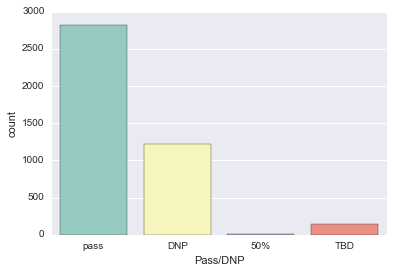

In [29]:
sns.countplot(df['Pass/DNP'], palette = 'Set3')

Quick look at pass rates by class name:

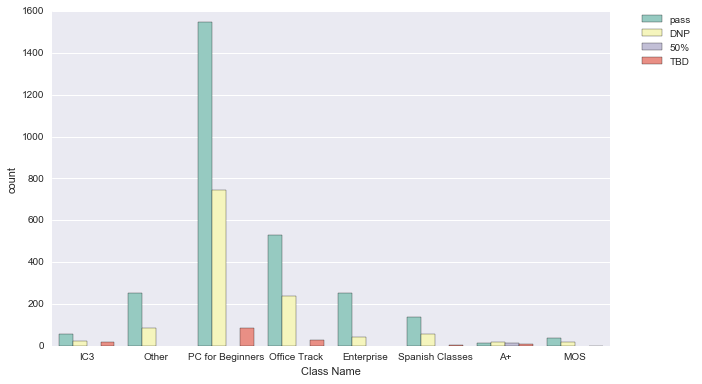

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Class Name',hue='Pass/DNP', palette = 'Set3')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Group class times into morning, afternoon, and evening:

In [31]:
df['Time'][df['Time'].isin(['9:00 AM-11:00 AM','9AM - 1PM','PASS','2 out of 3', '9 AM - 3 PM', '10 AM - 2 PM','10:00 AM - 12:00 PM',\
                           '9 AM - 1 PM', '9:30 AM - 11:30 AM','9 AM - 12:50 PM', '9 AM - 12:50 PM','11 AM - 1 PM', '9 AM - 12 PM',\
                           '10 AM - 12 PM', '9 AM - 11 AM'])] = 'morning'
df['Time'][df['Time'].isin(['12:00 PM - 2:00 PM','2 PM - 5 PM','12:30 PM - 4:30 PM','1PM - 4PM', '3:00 PM - 5:00 PM',\
                           '2:30 PM - 4:30 PM', '1:00 PM - 3:00 PM','1 PM - 4 PM', '1 PM - 5 PM', '2 PM - 4 PM','12:30 PM - 6 PM',\
                            '12:30 PM - 2:30 PM', '3:15 PM - 5:15 PM', '3 PM - 5 PM', '1 PM - 3 PM', '12 PM - 2 PM'])] = 'afternoon'
df['Time'][df['Time'].isin(['6:00 PM - 8:00','7:00 PM - 9:00 PM','5 PM - 7 PM','6 PM - 8:30 PM', '6:30 PM - 8:30 PM', '6 PM - 9PM',\
                           '7 PM - 9 PM', '6:00 PM - 8:00 PM', '6:45 PM - 8:45 PM', '7 PM - 8:50 PM', '4:30 PM - 6:30 PM',\
                           '6 PM - 9 PM', '6 PM - 9 PM', '6 PM - 8 PM'])] = 'evening'

Afternoon classes are most popular, followed by morning, then evening.

In [32]:
df['Time'].value_counts()

afternoon    1479
morning      1329
evening       836
Name: Time, dtype: int64

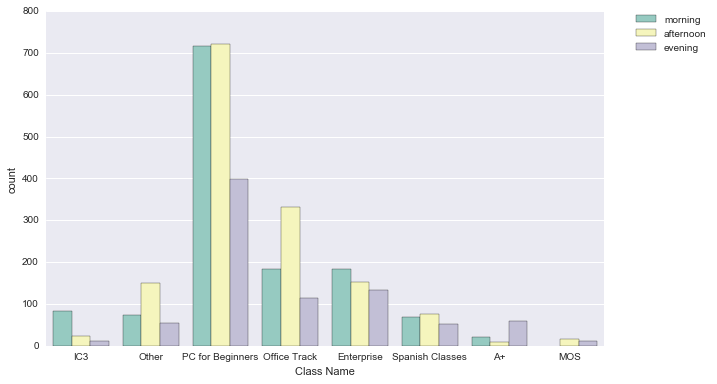

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Class Name',hue='Time', palette = 'Set3')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It would be interesting to look into student happiness.  Unfortunately a lot of this data is missing.  In the future, the survey may need multiple choice or a rating number to encourage more students to answer this question.

In [34]:
df['Happiness'].value_counts()

Unemployed                                                  1101
Very Happy                                                   211
Neutral                                                      200
Somewhat Happy                                               178
App Missing                                                  124
Somewhat Unhappy                                              95
Not Answered                                                  89
Very Unhappy                                                  76
Somewhat happy                                                57
Very happy                                                    23
1-page                                                        17
Very unhappy                                                  10
somewhat happy                                                 7
Somewhat                                                       5
neutral                                                        5
N/A`                     

In [35]:
df['Gender'][df['Gender'].isin(['Woman','woman','Female'])] = 'female'
df['Gender'][df['Gender'].isin(['Man','Male','man'])] = 'male'
df['Gender'][df['Gender'].isin(['Other: Trans','Other: Trans', 'Trans/Other'])] = 'trans'
df['Gender'][df['Gender'].isin(['1-page','Mini','App Missing', 'Not Answered'])] = 'no answer'

Below we can see significantly more Byte Back students are female than male.

In [37]:
df['Gender'].value_counts()

female       2578
male         1808
no answer     180
trans          11
Name: Gender, dtype: int64

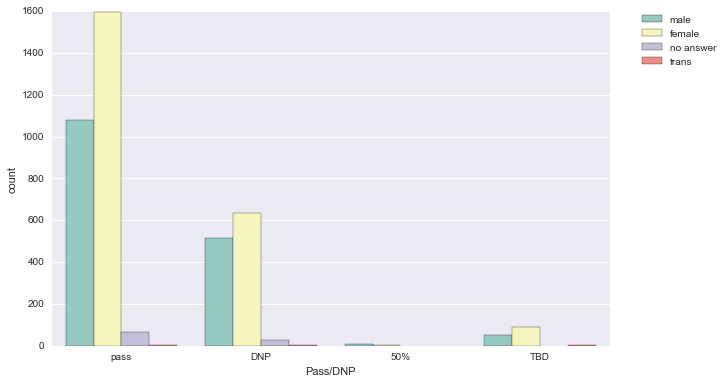

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Pass/DNP',hue='Gender', palette = 'Set3')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
df['Race'][df['Race'].isin(['Black/African American','Black/African-American','black', 'Black'])] = 'african american'
df['Race'][df['Race'].isin(['White/Caucasian'])] = 'white'
df['Race'][df['Race'].isin(['Hispanic/Latino', 'HISPANIC/LATINO'])] = 'hispanic'
df['Race'][df['Race'].isin(['Native American'])] = 'native american'
df['Race'][df['Race'].isin(['Black/African American,Asian/Pacific Islander, Hispanic/Latino', 'multiracial-hispanic', \
                           'Black/African-American, Hispanic/Latino','Black/African American, Hispanic/Latino' ])] = 'multiracial-hispanic'
df['Race'][df['Race'].isin(['Black/African American, White/Caucasian','Biracial', 'Black/African American, Native American',\
                           'Black/African American, Native American, White/Caucasian','Black/African American, White/Caucasian, Native American',\
                           'Multi-Racial'])] = 'multiracial-not hispanic'
df['Race'][df['Race'].isin(['Other: Ethiopian','Other:Moorish American','Other: Multi Racial','Other: English',\
                           'Other: spanish and India', 'Other: Jamaican', 'other', 'Hebrew', 'Asian/Pacific Islander', 'Other',\
                           'Other: all of the above','Other: Brazil', 'Other: Blank', 'Other: Mixed' ])] = 'other'
df['Race'][df['Race'].isin(['App Missing', 'Not Answered', 'Man', 'man', 'Woman', 'woman', 'Mini', '1-page'])] = 'no answer'

Most students are african american.  

In [40]:
df['Race'].value_counts()

african american            3831
hispanic                     254
no answer                    188
white                        125
other                         64
multiracial-not hispanic      48
native american               24
multiracial-hispanic           7
Name: Race, dtype: int64

Table below shows number of students that passed, did not pass (DNP), made 50%, or TBD in the categories of gender, and then race within that category.

In [43]:
pd.crosstab([df.Gender, df.Race], df['Pass/DNP'],  margins=True)

Pass/DNP                            50%   DNP  TBD  pass   All
Gender    Race                                                
female    african american            3   550   79  1371  2225
          hispanic                    0    38    3   105   153
          multiracial-hispanic        0     0    1     2     4
          multiracial-not hispanic    0     9    0    16    29
          native american             0     3    1     9    16
          no answer                   0     3    0    10    17
          other                       0    10    0    21    32
          white                       0    12    4    45    76
male      african american            6   444   49   933  1571
          hispanic                    1    23    0    70    99
          multiracial-hispanic        0     0    0     2     3
          multiracial-not hispanic    0     6    1    10    19
          native american             1     2    0     5     8
          no answer                   0     3    1     5    11
          other                       0    20    0    10    32
          white                       0    10    1    33    48
no answer african american            0     8    0     9    19
          hispanic                    0     0    0     2     2
          no answer                   0    18    0    52   158
          white                       0     0    0     1     1
trans     african american            0     3    2     3     9
          no answer                   0     0    0     2     2
All                                  11  1219  142  2823  4705

Below is a another table to highlight the information on student enrollment.

In [44]:
pd.crosstab(df.Gender, df.Race,  margins=True)

Race,african american,hispanic,multiracial-hispanic,multiracial-not hispanic,native american,no answer,other,white,All
Gender,,,,,,,,,
female,2225,153,4,29,16,17,32,76,2578
male,1571,99,3,19,8,11,32,48,1808
no answer,19,2,0,0,0,158,0,1,180
trans,9,0,0,0,0,2,0,0,11
All,3831,254,7,48,24,188,64,125,4705


In [45]:
#save cleaned data file to csv for later use (I will make some charts in tableau)
df.to_csv('byteback_cleaned.csv')